# 타이타닉 
---
- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성
- 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용


## 일단 사용하는 모듈 
 - 넘파이 
 - 판다스 
 - 맷폴랫
 - 시본 
 
 - missingno =>  missingno 패키지를 사용하면 누락데이터에 대한 시각화
 - 워닝 방지 


In [18]:
# !pip install missingno 

In [19]:
# import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

import missingno as msno


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 앞으로의 프로세스 
### 1. 데이터 셋 확인 
    - null data 확인(결측치)하고 추후 수정 
### 2. 탐색적 데이터 분석(**E**xploratory **D**ata **A**nalysis)  
    - 여러 특징(feature)들을 개별적으로 분석하고 특징들의 상관관계를 확인 
    - 여러 시각화 툴을 이용하여 통찰력(insight)을 얻음 
### 3. 특징을 엔지니어링
    - 모델의 성능을 높일 수 있도록 특징들을 엔지니어링
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리등...
### 4. 모델 만들기 
    - 사잇킷런을 사용하여 모델을 생성 
    - sklearn 을 사용하면 수많은 알고리즘을 일괄된 문법으로 사용가능
### 5. 모델 학습 및 예측 
    - 트레인 셋을 가지고 모델 학습
    - 테스트 셋으로 예측(prediction)함 
### 6. 모델 평가 
    - 예측 성능이 원하는 수준인지 판단 
    - 풀려는 문제에 따라 모델을 평가하는 방식이 달라짐 

## 1. 데이터 셋 확인
- null data 확인하고 추후 수정 
- 판다스 => 테이블화 된 데이터를 다루는데 가장 최적화 된 라이브러리 
- pandas를 사용하여 데이터 셋의 간단한 통계적 분석, 복잡한 처리들을 간단한 메소드를 사용하여 작업  
- 판다스는 반복또 반복
---
- 캐글의 데이터 셋은 train, testset로 나누어짐 

In [20]:
df_train = pd.read_csv('../input/train.csv')
df_test  = pd.read_csv('../input/test.csv')

In [21]:
df_train.head()
# print(df_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.shape

(891, 12)

In [23]:
df_test.shape

(418, 11)

### 제공 데이터 확인 
- 데이터의 특징은 class, Age, SibSp, Parch, Fare
- 예측하고자 하는것은 생존자 
    => target label 은 Survived 
- parch => 함께 탑승한 부모, 아이의 수 (정량적)
- SibSp => 함께 탑승한 형제와 배우자의 수 (정략적)
- Fare => 탑승료 

---
- describe() 메소드=> 특징을 가진 통계치들을 반환     
[describe()_Eng](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [24]:
# 트레인 데이터 통계치 확인 
# describe()메소드 사용 
df_train.describe()# age에서 결측치 177개 확인가능 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# 더확인 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# 테스트 데이터 통계치 확인 
df_test.describe() # age에서 결측치 86 그리고 fare 결측치 1  확인 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
# 승객 아이디 숫자와 다른 결측데이터가 존재하는 열이 있음 
# 데이터를 한눈에 보기위해서 시각화 

# 결측치 확인 

In [28]:
df_train.Age.isnull().sum()/ df_train['Age'].shape[0]

0.19865319865319866

In [29]:
# 근데 왜 ?? 
for col in df_train.columns:
#     print(col)
    msg = 'column : {:>10}\t percent of NaN value: {:.2f}%'.format(col,100) # 퍼센트로 확인 
    print(msg)

column : PassengerId	 percent of NaN value: 100.00%
column :   Survived	 percent of NaN value: 100.00%
column :     Pclass	 percent of NaN value: 100.00%
column :       Name	 percent of NaN value: 100.00%
column :        Sex	 percent of NaN value: 100.00%
column :        Age	 percent of NaN value: 100.00%
column :      SibSp	 percent of NaN value: 100.00%
column :      Parch	 percent of NaN value: 100.00%
column :     Ticket	 percent of NaN value: 100.00%
column :       Fare	 percent of NaN value: 100.00%
column :      Cabin	 percent of NaN value: 100.00%
column :   Embarked	 percent of NaN value: 100.00%


In [30]:
for col in df_train.columns:
    percent = df_train[col].isnull().sum() / df_train[col].shape[0]
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [31]:
df_test.shape

(418, 11)

In [32]:
# test도 동일한 방법으로 확인 

for i in df_test.columns:
#     print(i) # 정상 출력 
    # 1. 일단 공식부터 예) 100개중 5개5개 2개 -> 5+5+2 /100 => 0.12  
    # => 결측치의 합 / 총 갯수 
    # shape => 
    percent = df_test[i].isnull().sum() / df_test[i].shape[0]
#     print(percent)
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 20.57%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.00%
column:   Embarked	 Percent of NaN value: 0.24%
column:   Embarked	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [33]:
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


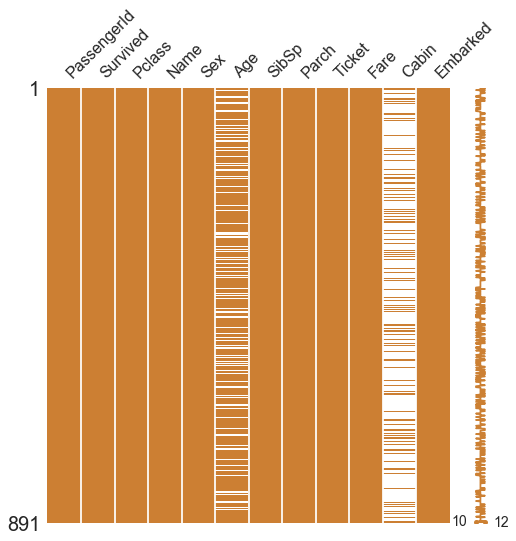

In [34]:
msno.matrix(df = df_train.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2))

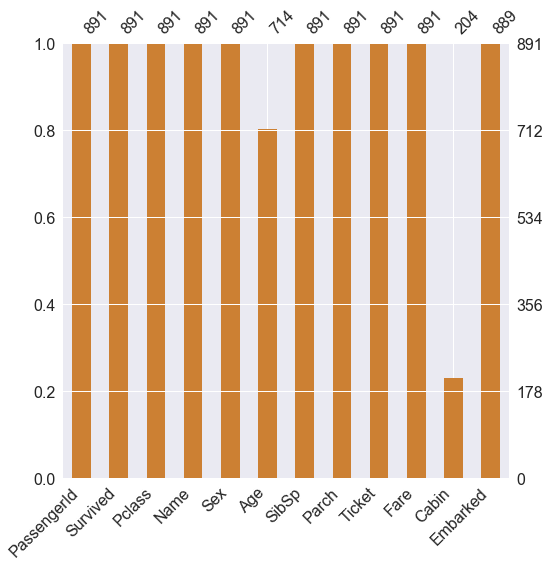

In [36]:
# 바차트  => 훨신 직관적 
# df_train
msno.bar(df = df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

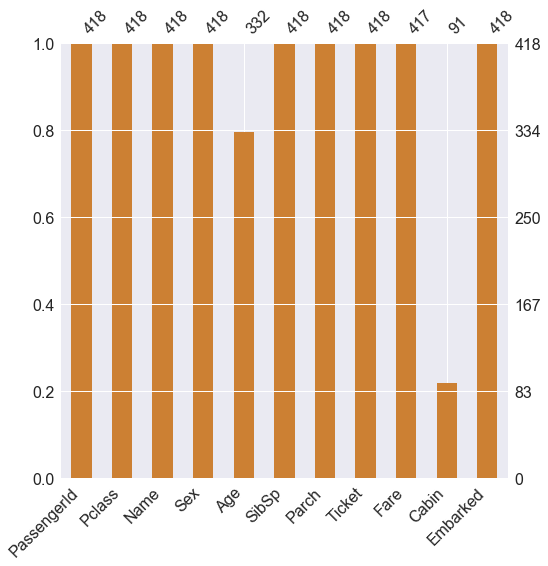

In [37]:
# df_test
msno.bar(df = df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# 타겟 데이터 확인 
- 어떤 분포(distribution)를 가지고 있는 지 확인이 필요 
- 이진 분류(binary classification)문제에서는 0과 1의 분포가 어떠냐에 따라 모델의 평가방법이 다름     

#### 그래프를 그려보겠음 

In [39]:
df_train['Survived'].value_counts() # 0: 죽은사람 1: 산사람

0    549
1    342
Name: Survived, dtype: int64

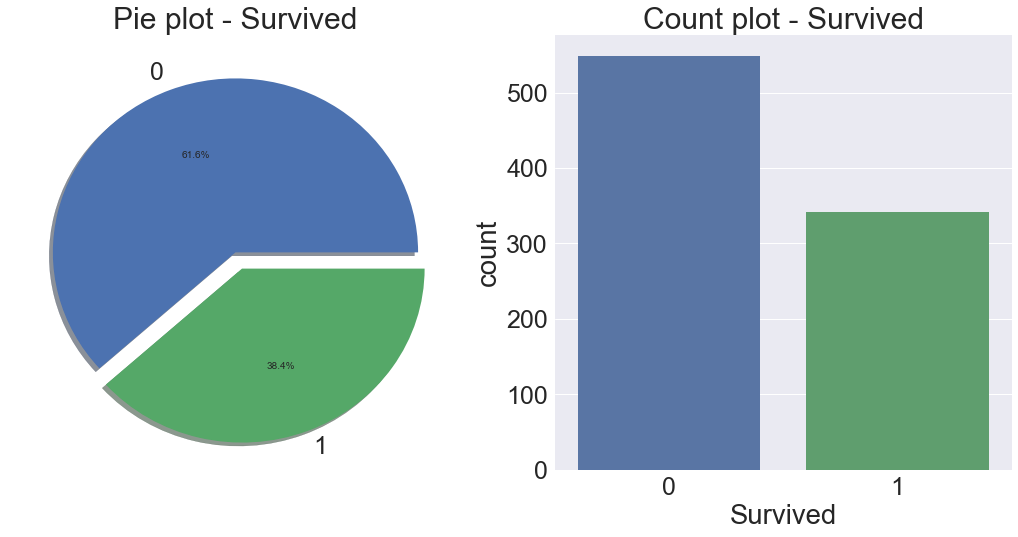

In [38]:
# 그래프 => 두개를 그림 
# 하나는 원 그래프 하나는 막대 그래프 

f, ax = plt.subplots(1,2,figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct ="%1.1f%%",ax =ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 죽은 사람이 눈에 띄게 많은것을 확인할수 있음
- 38.4% 만 살아남은것을 확인할수있음 